In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [3]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


 98% 601M/612M [00:05<00:00, 144MB/s]
100% 612M/612M [00:05<00:00, 110MB/s]


In [4]:
!unzip traffic.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [9]:
imgs_path = "Train"
data = []
labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(img_path + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("success")

success


In [10]:
data

array([[[[ 67,  68,  70],
         [ 67,  66,  67],
         [ 61,  60,  59],
         ...,
         [ 43,  39,  37],
         [ 39,  36,  32],
         [ 36,  31,  28]],

        [[ 78,  76,  77],
         [ 75,  74,  76],
         [ 75,  72,  72],
         ...,
         [ 62,  60,  58],
         [ 61,  60,  57],
         [ 62,  60,  59]],

        [[129, 129, 131],
         [126, 126, 128],
         [125, 124, 125],
         ...,
         [ 69,  69,  69],
         [ 71,  71,  73],
         [ 72,  71,  75]],

        ...,

        [[164, 164, 170],
         [167, 166, 170],
         [161, 165, 168],
         ...,
         [151, 156, 163],
         [151, 155, 162],
         [150, 155, 163]],

        [[163, 164, 169],
         [165, 165, 170],
         [164, 165, 168],
         ...,
         [153, 157, 162],
         [153, 157, 162],
         [154, 157, 161]],

        [[166, 166, 169],
         [165, 166, 169],
         [164, 164, 169],
         ...,
         [154, 157, 161],
        

In [11]:
labels


array([ 0,  0,  0, ..., 42, 42, 42])

In [12]:
labels.shape

(39209,)

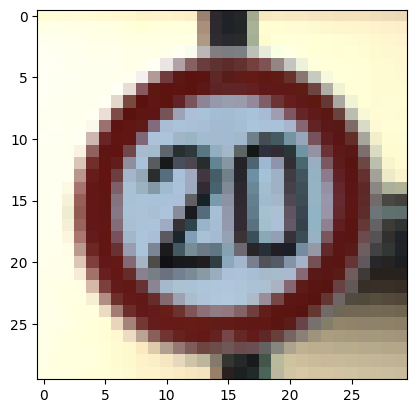

In [14]:
path = "Train/0/00000_00004_00029.png"
img = Image.open(path)
img = img.resize((30, 30))
sr = np.array(img)
plt.imshow(img)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


In [20]:
import keras

In [21]:
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [23]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
epochs = 5
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
491/491 [==============================] - 124s 247ms/step - loss: 2.4373 - accuracy: 0.4044 - val_loss: 0.9694 - val_accuracy: 0.7752
Epoch 2/5
491/491 [==============================] - 110s 223ms/step - loss: 1.0889 - accuracy: 0.6823 - val_loss: 0.4861 - val_accuracy: 0.8703
Epoch 3/5
491/491 [==============================] - 115s 234ms/step - loss: 0.7915 - accuracy: 0.7605 - val_loss: 0.3674 - val_accuracy: 0.9092
Epoch 4/5
491/491 [==============================] - 112s 228ms/step - loss: 0.6254 - accuracy: 0.8111 - val_loss: 0.3115 - val_accuracy: 0.9167
Epoch 5/5
491/491 [==============================] - 113s 230ms/step - loss: 0.4974 - accuracy: 0.8503 - val_loss: 0.1948 - val_accuracy: 0.9407


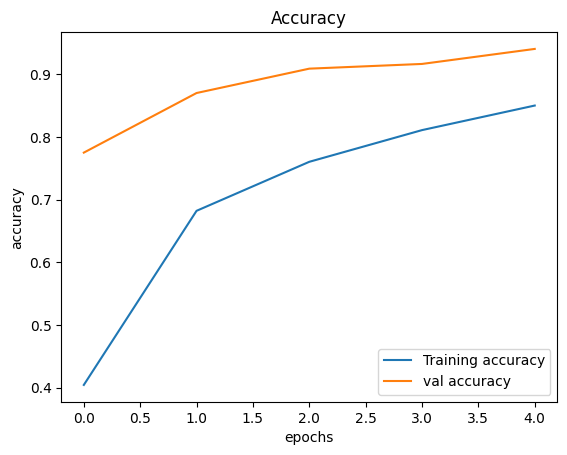

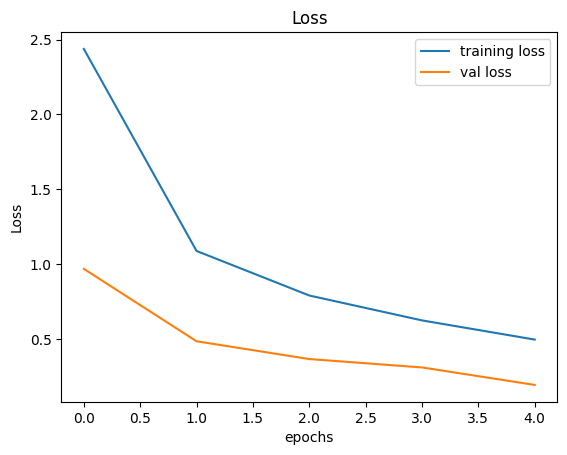

In [25]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("Test.csv")
test_labels_true = test['ClassId'].values  # Use a different variable name
test_imgs = test['Path'].values
test_data = []
for img in test_imgs:
    im = Image.open(img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)

# Assuming you already have 'model' loaded and 'x_test' prepared
predictions = model.predict(test_data)

# Get the predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Now calculate accuracy using the true labels and predicted labels
print("accuracy: ", accuracy_score(test_labels_true, predicted_classes))


395/395 [==============================] - 13s 33ms/step
accuracy:  0.9017418844022169


In [39]:
model.save('traffic_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
